data can be downloaded from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

# This database contains car's market prices and different attributes. This includes normalized losses, which represents the average loss per year for insuring a specific car type.

# first import the data and give appropriate column headings

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=pd.read_csv('imports-85.data',delimiter=',',names=cols)

# second clean data by replacing ? with Nan,
# removing Nan values
# and normalizing values

In [2]:
cars=cars.replace('?', np.nan)
cars['normalized-losses']=pd.to_numeric(cars['normalized-losses'])
cars_df=cars.dropna()


In [3]:
# convert columns that are not numeric to numeric before normalizing
cars_df['horsepower']=pd.to_numeric(cars_df['horsepower'])
cars_df['peak-rpm']=pd.to_numeric(cars['peak-rpm'])
cars_df['price']=pd.to_numeric(cars_df['price'])
cars_df['bore']=pd.to_numeric(cars_df['bore'])
cars_df['stroke']=pd.to_numeric(cars_df['stroke'])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [4]:
#normalize columns so that all values fall between 0 and 1
hold_rel=cars_df.select_dtypes(include=['number'])
hold_rel=hold_rel.astype(np.float64)
hold_obs=cars_df.select_dtypes(include=['object'])
hold_shape=hold_rel.shape
hold_test=hold_rel
for i in range(0,hold_shape[1]):
    min_hold=hold_rel.iloc[:,i].min()
    max_hold=hold_rel.iloc[:,i].max()
    dif_hold=max_hold-min_hold
    for f,v in enumerate (hold_rel.iloc[:,i]):
        hold_rel.iat[f,i]=(((v-min_hold)/dif_hold)) 
cars_new=pd.concat([hold_rel,hold_obs],axis=1)


Third, run different k nearest neighbor models predicting normalized losses.

Use root mean square error to asses different model's performance

In [5]:
# the first model uses every numeric column, except for 
# the target variable, as a predictor in seperate models.
# Each model's resulting rmse is stored in the rmse 
# variable wich is the function's output

def knn_train_test_simple(df,target_vars):
    hold_train_vars=df.select_dtypes(include=['number'])
    hold_train_vars_final=hold_train_vars.drop([target_vars],axis=1)
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    for column in hold_train_vars_final:
        knn=KNeighborsRegressor()
        knn.fit(train[[column]],train[[target_vars]])
        labels=knn.predict(test[[column]])
        mse=mean_squared_error(test[[target_vars]],labels)
        rmse=mse**1/2
        rmse_all[column]=rmse
    return rmse_all

In [6]:
test_simple=knn_train_test_simple(cars_new,'normalized-losses')
test_simple

{'bore': 0.036394657492941525,
 'city-mpg': 0.027935555494641044,
 'compression-rate': 0.02079094597187577,
 'curb-weight': 0.039731202543789916,
 'engine-size': 0.03461208574326362,
 'height': 0.03151958553767714,
 'highway-mpg': 0.023061730763959315,
 'horsepower': 0.03338977824072805,
 'length': 0.026324470272196487,
 'peak-rpm': 0.03762798443025136,
 'price': 0.04049602532825307,
 'stroke': 0.03271412516104273,
 'symboling': 0.016295592226090293,
 'wheel-base': 0.03192622186891807,
 'width': 0.03576478166716921}

In [7]:
# This model is the same as the previous, except that 
# the number of clusters is varied for each model 
from sklearn.neighbors import KNeighborsRegressor
def knn_train_test_k_params(df,target_vars):
    hyperparams=[x for x in range(1,10,2)]
    hold_train_vars=df.select_dtypes(include=['number'])
    hold_train_vars_final=hold_train_vars.drop([target_vars],axis=1)
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    hold_rmse=[]
    for column in hold_train_vars_final:
        for i in hyperparams:
            knn=KNeighborsRegressor(n_neighbors=i,algorithm='brute')
            knn.fit(train[[column]],train[[target_vars]])
            labels=knn.predict(test[[column]])
            mse=mean_squared_error(test[[target_vars]],labels)
            rmse=mse**1/2
            hold_rmse.append(rmse)
        rmse_all[column]=hold_rmse
        hold_rmse=[]
    return rmse_all
   

In [8]:
test_k_vary=knn_train_test_k_params(cars_new,'normalized-losses')
test_k_vary

{'bore': [0.05451022450042488,
  0.04677933566635904,
  0.03605979825114443,
  0.03222593785190949,
  0.028041233031501932],
 'city-mpg': [0.04145377045585373,
  0.03388921630437761,
  0.02967287080946246,
  0.028293544193259114,
  0.02638550474947047],
 'compression-rate': [0.04219490967901098,
  0.028726711621574696,
  0.022331240919930922,
  0.023625626479313523,
  0.027063969710598552],
 'curb-weight': [0.03718373948082564,
  0.04051698144239467,
  0.039632397686466925,
  0.038656808492427426,
  0.0385568540498504],
 'engine-size': [0.03181176502837093,
  0.03578719820667684,
  0.03439722047093007,
  0.03634323346399496,
  0.036353572009918234],
 'height': [0.03599442175378964,
  0.030382786777896558,
  0.027933609276061505,
  0.03109133129965892,
  0.02982516097505178],
 'highway-mpg': [0.042997382198952876,
  0.025914098358658544,
  0.02746487212521586,
  0.02495718347095972,
  0.023586199614817248],
 'horsepower': [0.043422603547051894,
  0.041623721937446886,
  0.03410016172802

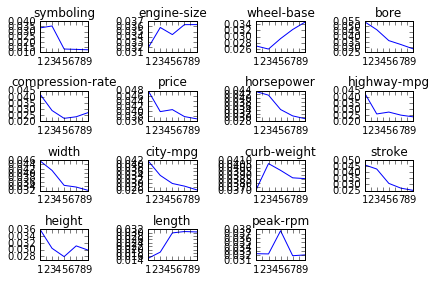

In [9]:
# this plots the relationship between RMSE and k clusters
# for each model

%matplotlib inline
import matplotlib.pyplot as plt
hyperparams=[x for x in range(1,10,2)]
fig = plt.figure()
d=1
for i,v in test_k_vary.items():
    ax=fig.add_subplot(4,4,d)
    ax.plot(hyperparams,v)
    ax.set_title(i)
    d=d+1
plt.tight_layout()
plt.show()
    
    



In [10]:
# new function that uses multiple features to predict the 
# target variable
def knn_train_test_multi(df,target_vars,test_vars):
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse={}
    knn=KNeighborsRegressor()
    knn.fit(train[test_vars],train[[target_vars]])
    labels=knn.predict(test[test_vars])
    mse=mean_squared_error(test[[target_vars]],labels)
    rmse=mse**1/2
    return rmse

In [11]:
# combine the three features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[1:4]
test_multiple_features=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_multiple_features

0.031491118664510286

In [12]:
# combine the four features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[1:5]
test_rmse=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_rmse

0.03221923741125517

In [13]:
# combine the five features that individually result in the 
# lowest RMSE into one model 
small_vals=sorted(test_simple, key=test_simple.get)[1:6]
test_rmse=knn_train_test_multi(cars_new,'normalized-losses',small_vals)
test_rmse

0.02757947972917409

In [14]:
# new function that accepts multiple features and varies
# the cluster numbers 
def knn_train_test_k_params_multi(df,target_vars,test_vars):
    hyperparams= [x for x in range(1,26)]
    nums_train=round(df.shape[0]*.75)
    train=df.iloc[0:nums_train]
    test=df.iloc[nums_train:df.shape[0]+1]
    rmse_all={}
    hold_rmse=[]
    for i in hyperparams:
        knn=KNeighborsRegressor(n_neighbors=i,algorithm='brute')
        knn.fit(train[test_vars],train[[target_vars]])
        labels=knn.predict(test[test_vars])
        mse=mean_squared_error(test[[target_vars]],labels)
        rmse=mse**1/2
        hold_rmse.append(rmse)
    rmse_all=hold_rmse
    return rmse_all

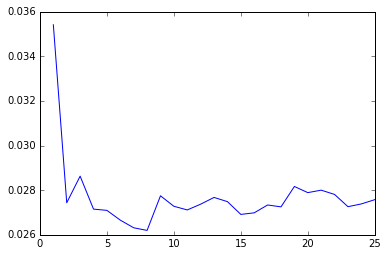

In [15]:
# combine the five features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[1:6]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)


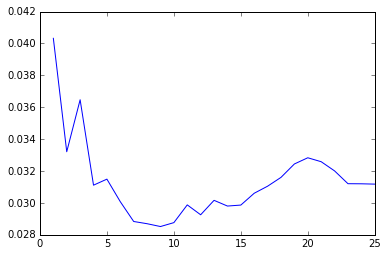

In [16]:
# combine the four features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[1:4]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)


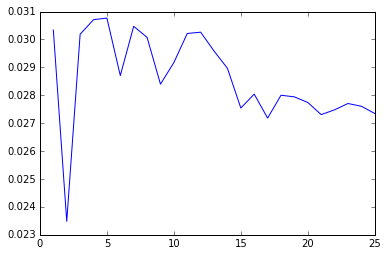

In [17]:
# combine the three features that individually result in the 
# lowest RMSE into one model and vary cluster size
small_vals=sorted(test_simple, key=test_simple.get)[1:3]
test_rmse=knn_train_test_k_params_multi(cars_new,'normalized-losses',small_vals)
hyperparams= [x for x in range(1,26)]
plt.plot(hyperparams,test_rmse)


From this analysis it appears that a model with 2 clusters
using the features compression-rate and highway-mpg results in the lowest RMSE value when predicting normalized losses